Epoch [2/15], Loss: 63.0178
Epoch [4/15], Loss: 21.4145
Epoch [6/15], Loss: 7.2859
Epoch [8/15], Loss: 2.4877
Epoch [10/15], Loss: 0.8580
Epoch [12/15], Loss: 0.3044
Epoch [14/15], Loss: 0.1163


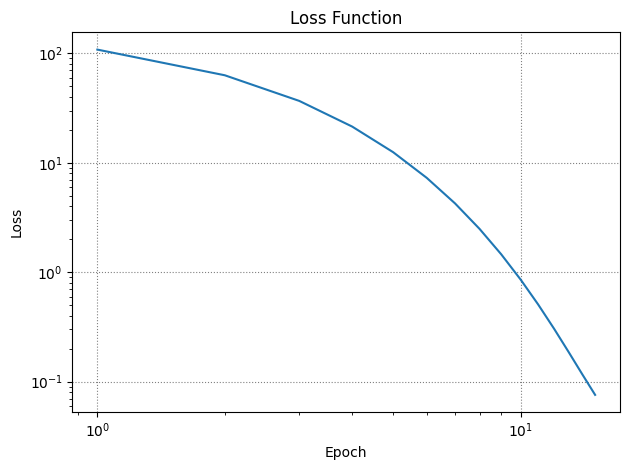

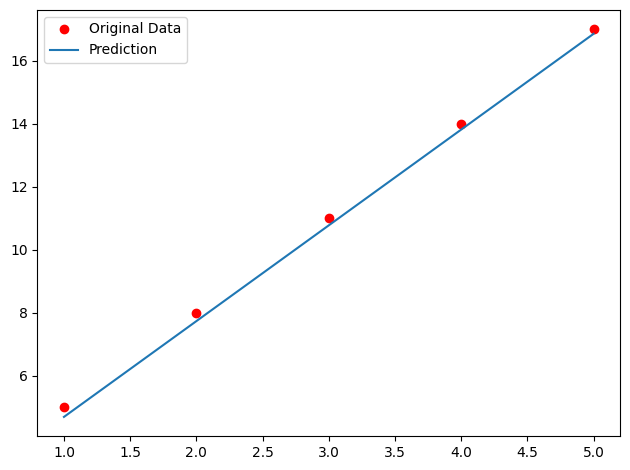

In [7]:

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the training data
X = np.array([[1], [2], [3], [4], [5]], dtype=np.float32)   
Y = np.array([3 * x + 2 for x in X], dtype=np.float32)

# Tell pytorch that the arrays should be treated as pytorch tensors
X_train = torch.tensor(X, dtype=torch.float32) 
Y_train = torch.tensor(Y, dtype=torch.float32)

# Create a linear model of one layer and one neuron
model = nn.Linear(1, 1) 

# Define loss function and optimizer
criteria = nn.MSELoss()  
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training step
losses = []  # Empty array to store the loss at each epoch
num_epochs = 15  # Define the number of epochs

for epoch in range(num_epochs):  # Iterate over the number of epochs
    outputs = model(X_train)  # Evaluate the model on X_train
    loss = criteria(outputs, Y_train)  # Compute the loss

    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Backpropagation
    optimizer.step()  # Update the parameters

    if (epoch + 1) % 2 == 0:  # Print every 100 epochs
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
    losses.append(loss.item())

# Plot loss over epochs
fig, ax = plt.subplots()

plt.plot(range(1, num_epochs + 1), losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Function')
ax.set_xscale('log')
ax.set_yscale('log')


ax.grid(which = 'major', axis = 'both', linestyle = ':', color = 'gray')
plt.tight_layout()
plt.show()

# Plot the original data and the predicted values
predicted = model(X_train).detach().numpy()
plt.plot(X, Y, "ro", label="Original Data")
plt.plot(X, predicted, label="Prediction")
ax.grid(which = 'major', axis = 'both', linestyle = ':', color = 'gray')
plt.tight_layout()
plt.legend()
plt.show()

